# ToDo

1-hyperparameter tuninning for each model to adjust f1-score for low class

2-search for better balancing way to balance data

3-try to make feature engineering to build new relevant features(unsuppervised like clustering)

4-try to handle outliers(logtransfom,powertransform,clipping outliers at IQR or robust scaling)

5-search for more effective feature

6-is there more better way than PCA? [take most important features and drop the rest]

7-try lightboost and softVoting between best models used

# make imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
data=pd.read_csv("train.csv")

In [5]:
data.head()

ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   0  58238    971.303       397.202654       186.945510      2.124697   
1   1  44515    757.601       265.590470       213.967453      1.241266   
2   2  31662    653.783       239.902428       168.421505      1.424417   
3   3  38778    734.020       268.446281       184.061923      1.458456   
4   4  42530    775.403       281.212824       193.236878      1.455275   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1      0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2      0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3      0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4      0.726511       43028     232.703412  0.729816  0.988426   0.888895   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.685561      0.006820      0.000929      0.469994      0.998595   
1     0.896387      0.005966      0.002376      0.803510      0.997370   
2     0.836931      0.007577      0.002293      0.700453      0.997737   
3     0.827733      0.006923      0.002005      0.685142      0.999250   
4     0.827499      0.006612      0.001912      0.684755      0.996507   

          y  
0     HOROZ  
1     SEKER  
2  DERMASON  
3  DERMASON  
4      SIRA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

# Check for missing values

In [7]:
data.isna().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [8]:
data.describe().T

count          mean           std           min  \
ID               10834.0   5416.500000   3127.650742      0.000000   
Area             10834.0  53095.675189  29542.542580  20420.000000   
Perimeter        10834.0    855.274892    214.991122    524.932000   
MajorAxisLength  10834.0    320.036169     85.961630    183.601165   
MinorAxisLength  10834.0    202.410342     45.113965    129.576207   
AspectRation     10834.0      1.581294      0.244314      1.024868   
Eccentricity     10834.0      0.750588      0.091481      0.218951   
ConvexArea       10834.0  53816.205926  29999.710739  20684.000000   
EquivDiameter    10834.0    253.123583     59.433080    161.243764   
Extent           10834.0      0.749937      0.048949      0.555315   
Solidity         10834.0      0.987152      0.004626      0.919246   
roundness        10834.0      0.873647      0.059344      0.489618   
Compactness      10834.0      0.800244      0.061228      0.645368   
ShapeFactor1     10834.0      0.006559      0.001127      0.002856   
ShapeFactor2     10834.0      0.001718      0.000593      0.000564   
ShapeFactor3     10834.0      0.644139      0.098268      0.416499   
ShapeFactor4     10834.0      0.995083      0.004306      0.947687   

                          25%           50%           75%            max  
ID                2708.250000   5416.500000   8124.750000   10833.000000  
Area             36343.500000  44645.000000  61295.000000  254616.000000  
Perimeter          703.601250    793.739500    975.517500    1985.370000  
MajorAxisLength    253.501071    296.377365    376.068399     738.860153  
MinorAxisLength    175.927024    192.525040    217.315195     450.926187  
AspectRation         1.432985      1.550761      1.703029       2.388873  
Eccentricity         0.716250      0.764314      0.809450       0.908167  
ConvexArea       36731.250000  45148.000000  62251.500000  263261.000000  
EquivDiameter      215.113880    238.419335    279.362162     569.374358  
Extent               0.718778      0.760141      0.786871       0.866195  
Solidity             0.985627      0.988290      0.990014       0.994677  
roundness            0.833479      0.883472      0.916883       0.990685  
Compactness          0.763378      0.801428      0.834068       0.987303  
ShapeFactor1         0.005888      0.006643      0.007268       0.009897  
ShapeFactor2         0.001161      0.001700      0.002169       0.003665  
ShapeFactor3         0.582747      0.642287      0.695670       0.974767  
ShapeFactor4         0.993690      0.996397      0.997895       0.999733

In [10]:
data['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

In [11]:
data['y'].replace({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6},inplace=True)

In [12]:
data.sample(1)

ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
8877  8877  50973    901.106        347.36297       189.503598      1.833015   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
8877      0.838079       51881     254.756431  0.774689  0.982498   0.788857   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  y  
8877     0.733401      0.006815      0.001216      0.537877      0.985937  3

# Explore classes imbalance

<AxesSubplot:>

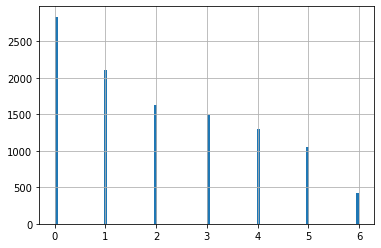

In [13]:
data['y'].hist(bins=int(np.sqrt(data['y'].shape[0])))

In [14]:
y=data['y']
X=data.drop(columns='y')

# split data with ratio between classes is fixed in train/test/div sets

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42,stratify=data['y'])

In [17]:
y_train.value_counts()/len(y_train)

0    0.261913
1    0.194646
2    0.149648
3    0.137302
4    0.120342
5    0.097612
6    0.038537
Name: y, dtype: float64

In [18]:
y_val.value_counts()/len(y_val)

0    0.261652
1    0.194739
2    0.149515
3    0.137517
4    0.120443
5    0.097370
6    0.038763
Name: y, dtype: float64

# Fit base model to see the effect of imbalance on classifier performance

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

# Important features to consider

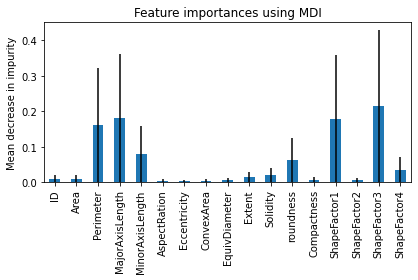

In [20]:
importances=clf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=forest_importances, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [21]:
y_pred=clf.predict(X_val)
y_pred_prob=clf.predict_proba(X_val)

In [22]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

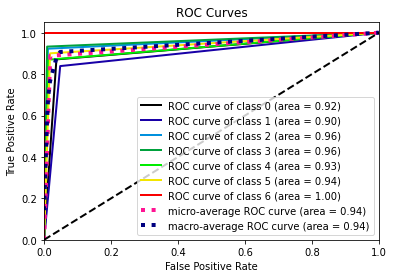

In [23]:
plot_roc(y_val, y_pred_prob)

model can differenatiate between different classes well so untill now we don't need to make down or oversampling or handeling

imbalance yet

# Preprocessing on train data

In [24]:
X_train_copy=X_train.copy()
y_train_copy=y_train.copy()
data_copy=pd.concat([X_train,y_train],axis=1)

# Give trial to oversampling low class

In [25]:
data_copy.head()

ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
3196  3196  30994    650.335       238.284268       165.932173      1.436034   
2816  2816  46471    814.123       309.820962       192.026374      1.613429   
991    991  39761    738.761       280.028283       181.261853      1.544883   
2691  2691  36349    686.851       226.519848       204.816876      1.105963   
7896  7896  26625    612.307       234.413909       145.041527      1.616185   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
3196      0.717690       31344     198.652426  0.755804  0.988834   0.920902   
2816      0.784761       47043     243.246202  0.799707  0.987841   0.881073   
991       0.762237       40191     225.000617  0.755482  0.989301   0.915502   
2691      0.427131       36645     215.130156  0.740879  0.991922   0.968227   
7896      0.785595       26972     184.119534  0.778782  0.987135   0.892403   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  y  
3196     0.833678      0.007688      0.002291      0.695020      0.998072  0  
2816     0.785119      0.006667      0.001563      0.616411      0.994536  1  
991      0.803492      0.007043      0.001811      0.645600      0.997376  0  
2691     0.949719      0.006232      0.003127      0.901966      0.997541  2  
7896     0.785446      0.008804      0.002067      0.616926      0.997066  0

In [26]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='all')

X_train_copy,y_train_copy = oversample.fit_resample(X_train_copy,y_train_copy)

<AxesSubplot:>

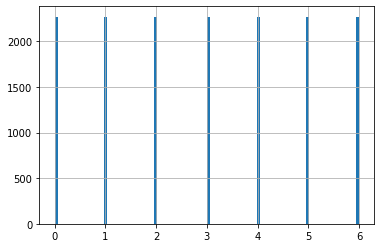

In [28]:
y_train_copy.hist(bins=int(np.sqrt(data['y'].shape[0])))

In [29]:
data_copy=pd.concat([X_train_copy,y_train_copy],axis=1)

# Overview on data distribution

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>],
       [<AxesSubplot:title={'center':'MinorAxisLength'}>,
        <AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>],
       [<AxesSubplot:title={'center':'EquivDiameter'}>,
        <AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>],
       [<AxesSubplot:title={'center':'Compactness'}>,
        <AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>],
       [<AxesSubplot:title={'center':'ShapeFactor4'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype

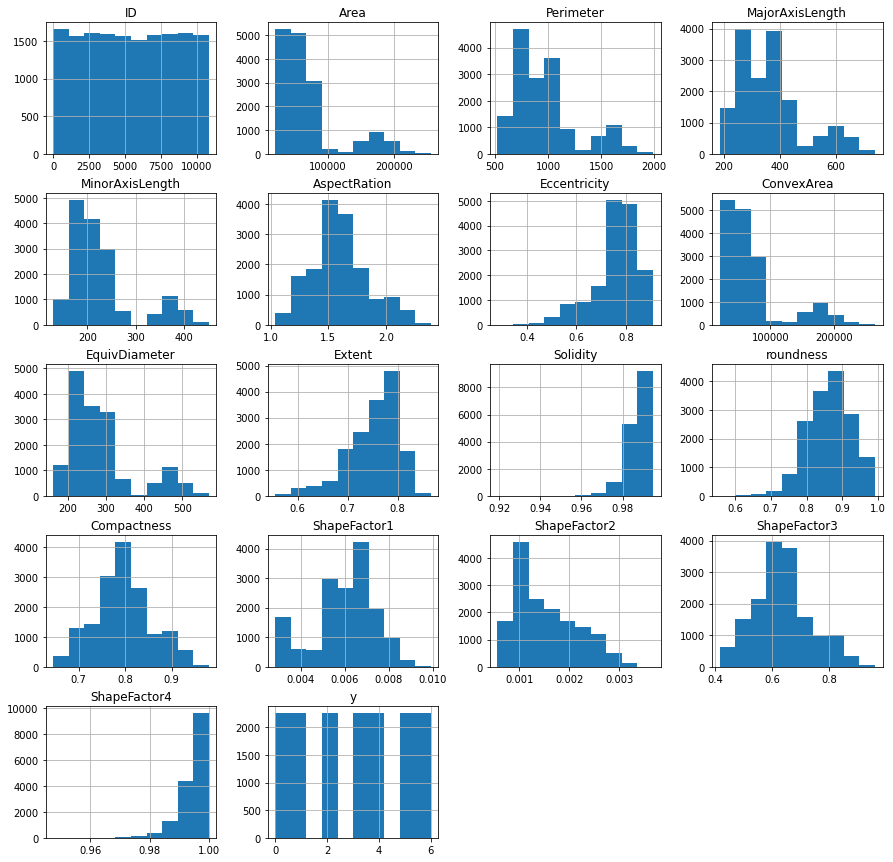

In [30]:
data_copy.hist(figsize=(15,15))

# Handeling skewness and outliers

# Explore correlation(linear relation) between data

In [31]:
data_copy.corr()['y'].sort_values(ascending=False)

y                  1.000000
Perimeter          0.862450
EquivDiameter      0.840541
MajorAxisLength    0.831038
MinorAxisLength    0.809199
ConvexArea         0.788299
Area               0.787336
Eccentricity       0.241494
AspectRation       0.211841
Extent             0.088637
ID                 0.002724
Compactness       -0.239441
ShapeFactor3      -0.243994
Solidity          -0.283513
ShapeFactor4      -0.342347
roundness         -0.469516
ShapeFactor2      -0.690181
ShapeFactor1      -0.859473
Name: y, dtype: float64

In [32]:
data_copy.corr().style.background_gradient(cmap='coolwarm')

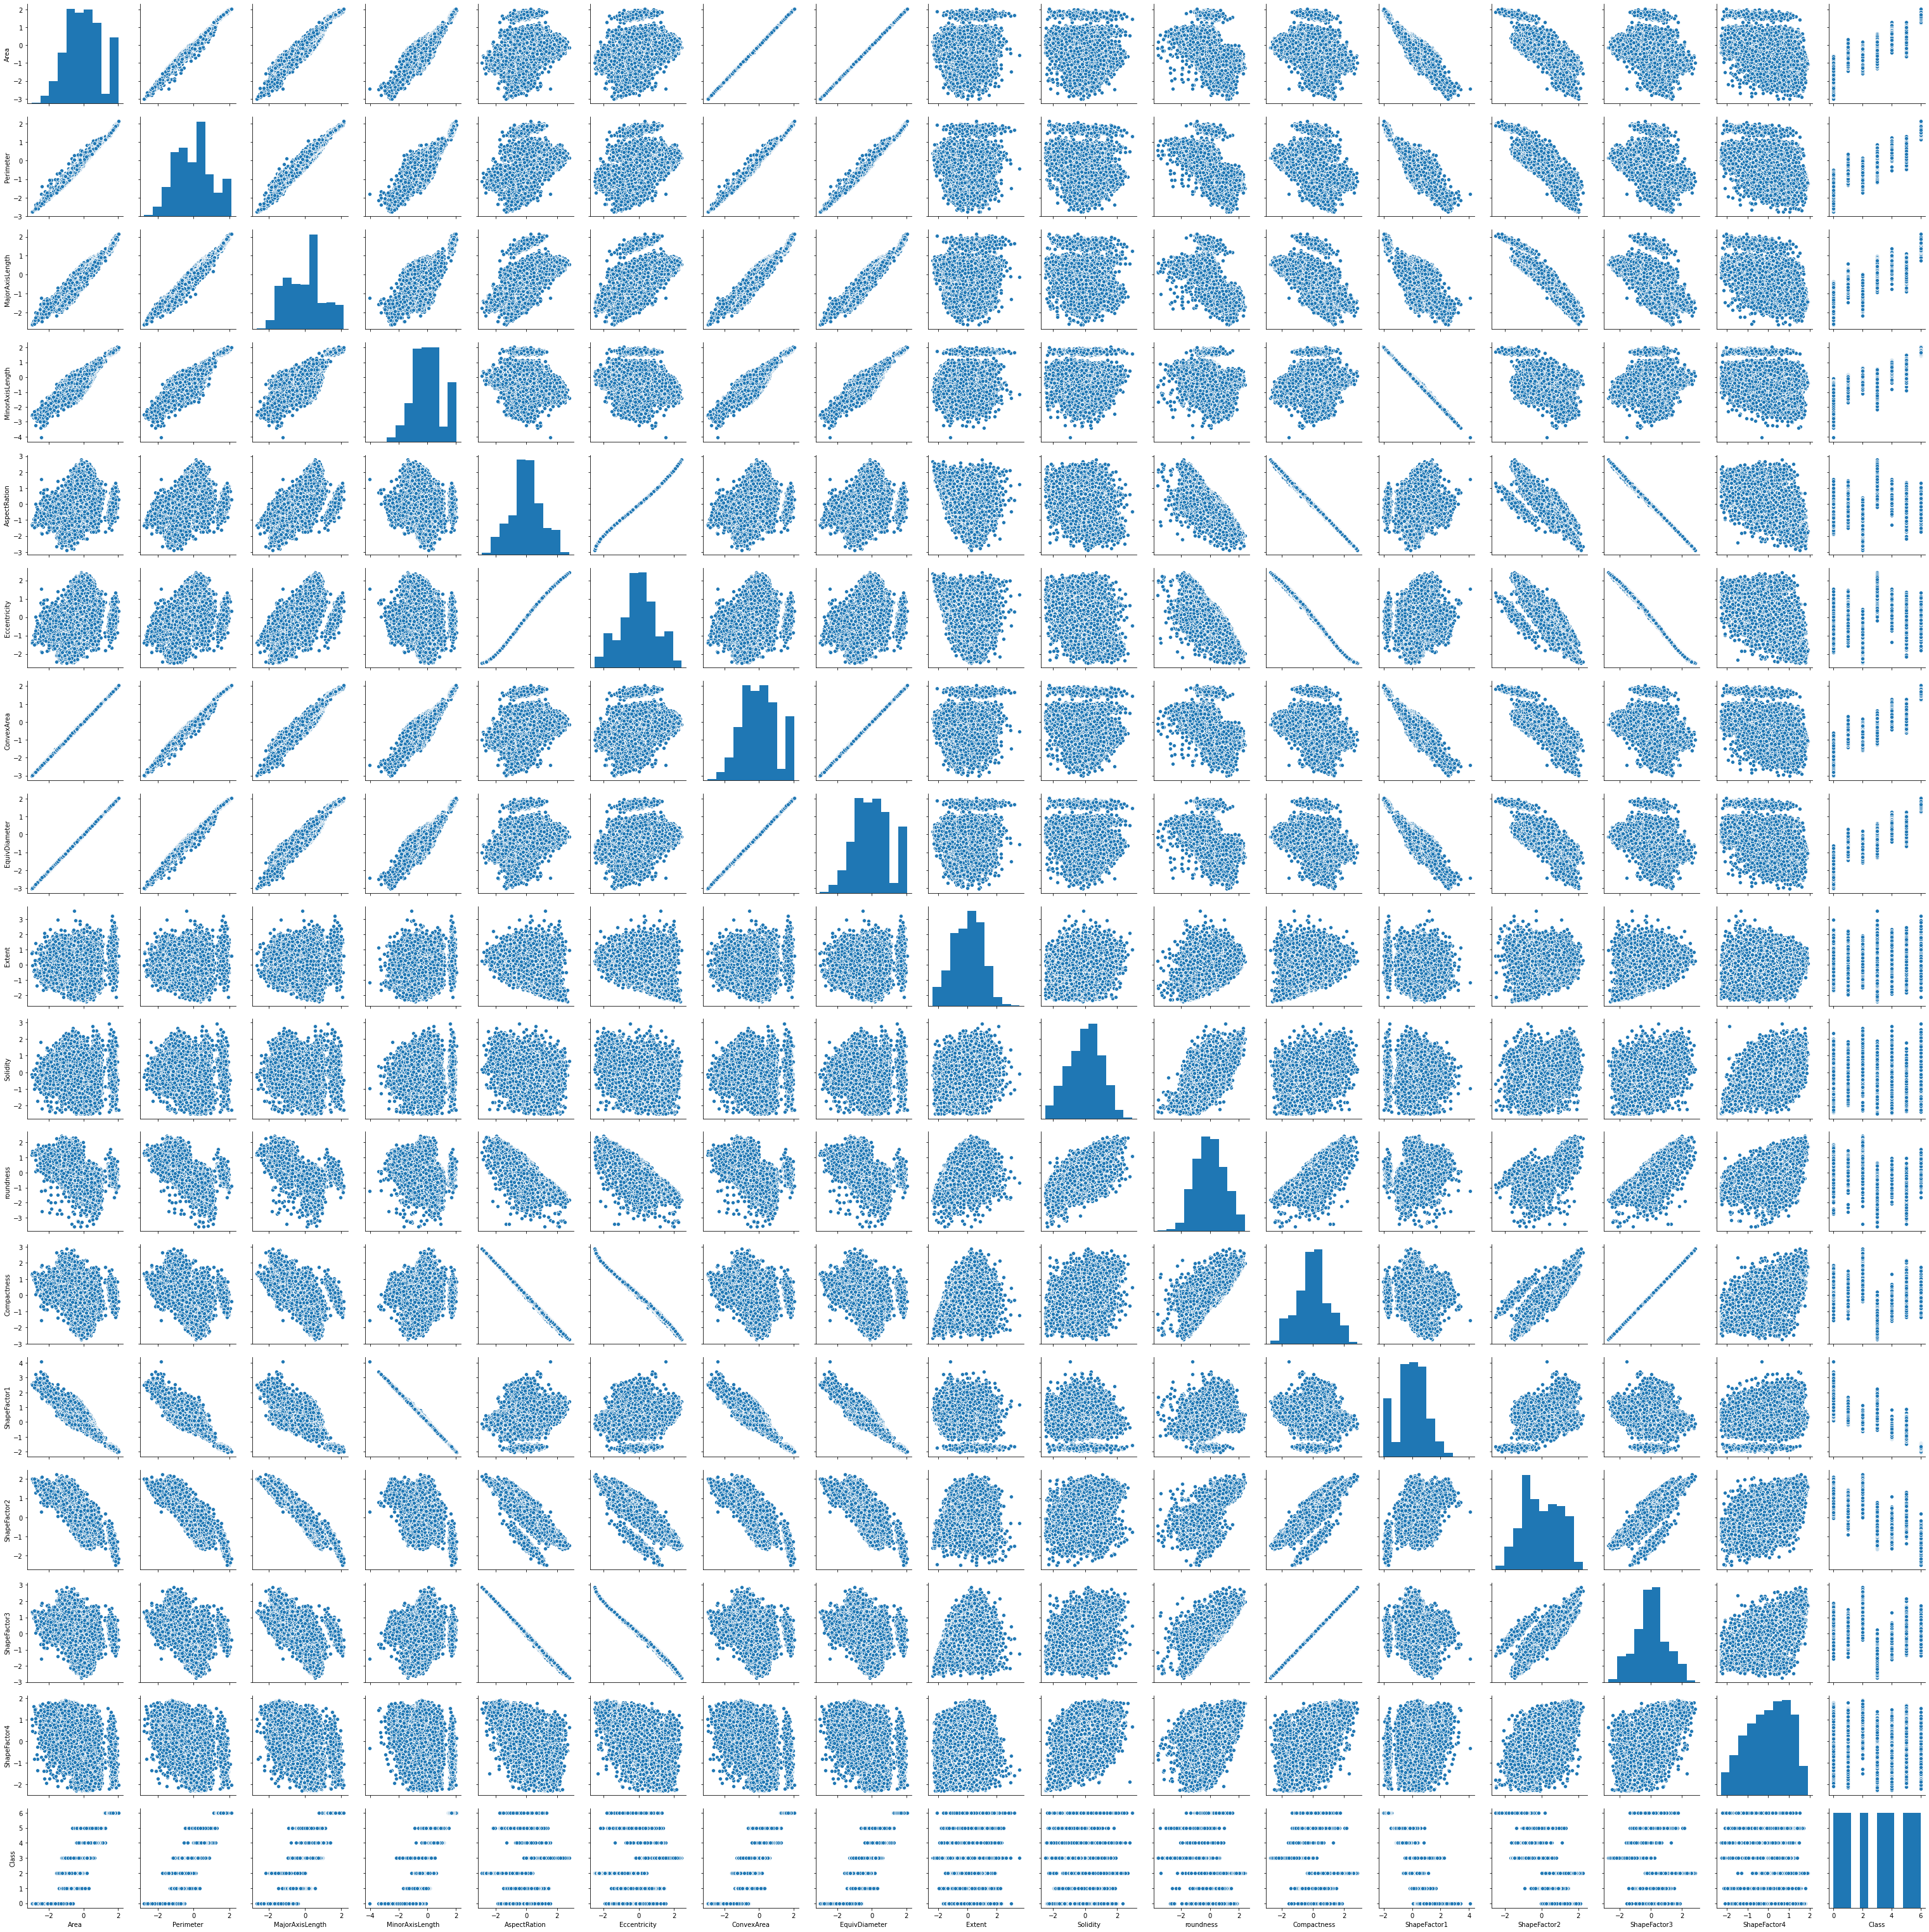

In [409]:
sns.pairplot(data_copy)

In [50]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data_copy_features=data_copy.drop(columns='Class')
data_copy_label=data_copy['Class']

In [51]:
data_copy_features_scaled=scale.fit_transform(data_copy_features)

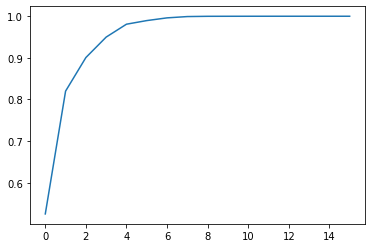

In [52]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data_copy_features_scaled)
exp_var=pca.explained_variance_ratio_
exp_cumsum=np.cumsum(exp_var)
plt.plot(exp_cumsum)

I think 4 components will achieve about 97% preserving the data so it's fine

In [53]:
pca=PCA(n_components=6)
X=pca.fit_transform(data_copy_features_scaled)
data_copy_pca=pd.DataFrame(X)
data_copy_pca.head()

0         1         2         3         4         5
0 -3.271954  1.049565  0.269881  1.845632 -0.310040  1.061420
1 -1.807269 -0.980002  0.062320 -0.372080  0.259046 -0.027657
2 -3.577669 -0.109248 -0.386789  0.513404 -0.347852  0.593870
3 -4.815102 -3.829241  0.886465 -0.067486  0.332748 -0.406917
4  1.727055  0.477886 -2.024290  1.254620  0.253574 -0.520149

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>]], dtype=object)

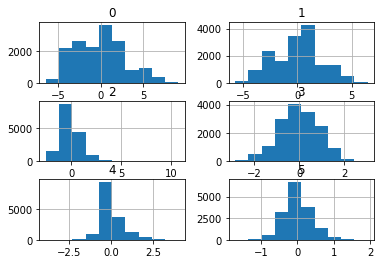

In [54]:
data_copy_pca.hist()

# Val data pipeline

In [535]:
X_val_scaled=scale.transform(X_val)
X=pca.transform(X_val_scaled)
val_data_copy_pca=pd.DataFrame(X)
val_data_copy_pca.head()

0         1         2         3         4         5
0 -3.622592  0.212285 -0.313224  0.779045 -0.145307  0.803574
1 -1.441537  0.771660 -0.273122 -0.968618 -0.440556  0.151984
2 -1.008754  0.923519 -0.242910  0.445130 -0.122346  0.106573
3  0.957294  1.068676 -0.824181  0.025772  0.851297 -0.059836
4  1.310085 -0.155887 -0.183197  1.294573 -0.044346 -0.122715

# Test base classifiers

In [536]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix

# Simple_SVM

In [537]:
clf_svm=SVC()
clf_svm.fit(data_copy_pca,data_copy_label)

SVC()

In [538]:
y_pred=clf_svm.predict(val_data_copy_pca)

In [539]:
accuracy_score(y_val,y_pred)

0.9251606978879706

In [540]:
f1_score(y_val,y_pred,average='micro')

0.9251606978879706

In [541]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       568
           1       0.84      0.87      0.85       422
           2       0.94      0.96      0.95       324
           3       0.95      0.96      0.96       308
           4       0.95      0.97      0.96       261
           5       0.98      0.94      0.96       211
           6       1.00      1.00      1.00        84

    accuracy                           0.93      2178
   macro avg       0.94      0.94      0.94      2178
weighted avg       0.93      0.93      0.93      2178



C:\Users\Honda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


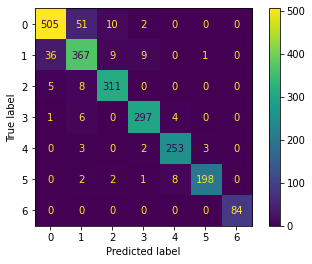

In [542]:
 plot_confusion_matrix(clf_svm,val_data_copy_pca,y_val)

# Random_search

In [543]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [544]:
distributions = dict(C=np.arange(0.01,5,0.1),kernel=['linear','rbf'])
clf = RandomizedSearchCV(clf_svm, distributions, random_state=0)
search = clf.fit(data_copy_pca,data_copy_label)


In [545]:
search.best_params_

{'kernel': 'rbf', 'C': 4.71}

In [546]:
search.best_score_

0.9447206741781491

In [550]:
best_svm_so_far=SVC(kernel= 'rbf', C= 4.71)
best_svm_so_far.fit(data_copy_pca,data_copy_label)

SVC(C=4.71)

In [551]:
score_cross_val=cross_val_score(best_svm_so_far,X_val_scaled,y_val,cv=3)

In [552]:
np.mean(score_cross_val)

0.9201101928374656

# Random_forrest

In [553]:
clf_rf = RandomForestClassifier(max_depth=6, random_state=0)
clf_rf.fit(data_copy_pca,data_copy_label)

RandomForestClassifier(max_depth=6, random_state=0)

In [554]:
y_pred=clf_rf.predict(val_data_copy_pca)

In [555]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       568
           1       0.79      0.83      0.81       422
           2       0.94      0.94      0.94       324
           3       0.94      0.94      0.94       308
           4       0.84      0.96      0.90       261
           5       0.97      0.87      0.92       211
           6       1.00      1.00      1.00        84

    accuracy                           0.90      2178
   macro avg       0.92      0.91      0.91      2178
weighted avg       0.90      0.90      0.90      2178



In [358]:
distributions = dict(n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],max_depth=np.arange(8,100), min_samples_split=[2,5,10],bootstrap=[True,False])
clf = RandomizedSearchCV(clf_rf, distributions, random_state=0)
search = clf.fit(data_copy_pca,data_copy_label)

In [359]:
search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=31, min_samples_split=5,
                       n_estimators=1800, random_state=0)

In [360]:
search.best_score_

0.9262916188289323

In [556]:
clf_rf2=RandomForestClassifier(bootstrap=False, max_depth=31, min_samples_split=5,
                       n_estimators=1800, random_state=0)

In [557]:
clf_rf2.fit(data_copy_pca,data_copy_label)

RandomForestClassifier(bootstrap=False, max_depth=31, min_samples_split=5,
                       n_estimators=1800, random_state=0)

In [558]:
y_pred=clf_rf2.predict(val_data_copy_pca)

In [559]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       568
           1       0.85      0.85      0.85       422
           2       0.94      0.95      0.95       324
           3       0.95      0.94      0.95       308
           4       0.95      0.97      0.96       261
           5       0.98      0.93      0.95       211
           6       1.00      1.00      1.00        84

    accuracy                           0.92      2178
   macro avg       0.94      0.94      0.94      2178
weighted avg       0.92      0.92      0.92      2178



# GradientBoost

In [328]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=800,min_samples_split=5,max_depth=10)

In [329]:
clf_gb.fit(data_copy_pca,data_copy_label)

GradientBoostingClassifier(max_depth=10, min_samples_split=5, n_estimators=800)

In [332]:
y_pred=clf_gb.predict(val_data_copy_pca)

In [333]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.92      0.93       211
      BOMBAY       1.00      0.98      0.99        84
        CALI       0.92      0.93      0.93       261
    DERMASON       0.90      0.94      0.92       568
       HOROZ       0.95      0.94      0.95       308
       SEKER       0.98      0.95      0.96       324
        SIRA       0.89      0.86      0.87       422

    accuracy                           0.93      2178
   macro avg       0.94      0.93      0.94      2178
weighted avg       0.93      0.93      0.93      2178



# XGboost

In [560]:
import xgboost as xgb

C:\Users\Honda\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [562]:
clf_xg=xgb.XGBClassifier()
clf_xg.fit(data_copy_pca,data_copy_label)

C:\Users\Honda\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Honda\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:33:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [563]:
y_pred=clf_xg.predict(val_data_copy_pca)

In [564]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       568
           1       0.85      0.86      0.85       422
           2       0.94      0.96      0.95       324
           3       0.96      0.94      0.95       308
           4       0.93      0.97      0.95       261
           5       0.98      0.91      0.95       211
           6       1.00      1.00      1.00        84

    accuracy                           0.92      2178
   macro avg       0.94      0.94      0.94      2178
weighted avg       0.92      0.92      0.92      2178

